In [2]:
import numpy
import matplotlib as mpl
import matplotlib.pyplot as pyplot
import scienceplots
import pandas as pd 
import numpy as np
import random 
from datetime import datetime
import matplotlib.ticker as ticker
from random import randrange, uniform



import json 
from numpy import loadtxt


#mpl.rcParams['axes.spines.left'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.sans-serif'] = 'Neue Haas Grotesk Text Pro'
pyplot.style.use(['science','grid'])


#pyplot.rc('text', usetex=True)
val = 35
width = 0.35

# standard pthread vs dlock

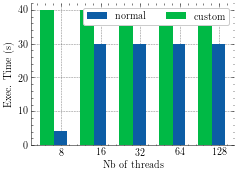

In [4]:
dataframe = pd.read_csv("./expes/prelim.dat",names=["cores","normal","custom"],sep='\t')

f, (ax1) = pyplot.subplots(1,1)

ax1.set_xlabel("Nb of threads")
ax1.set_ylabel("Exec. Time (s)")

threads_nb = [8,16,32,64,128]
x = np.arange(len(threads_nb))

ax1.tick_params(axis='x', which='major')

ax1.xaxis.set_major_locator(ticker.FixedLocator((x)))
ax1.xaxis.set_major_formatter(ticker.FixedFormatter((threads_nb)))


rec1=ax1.bar(x-width/10,dataframe["normal"],width,lw=2,label="normal")
rec2=ax1.bar(x-width,dataframe["custom"],width,lw=2,label="custom")

ax1.legend(ncol=2)

ax1.tick_params(axis='y', which='major')
ax1.tick_params(axis='x', which='major')

pyplot.tight_layout()
#pyplot.savefig("memory_overhead.pdf",format="pdf",dpi=300)


pyplot.show()

